In [1]:
import pandas as pd
#import pickle
#import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
hospcharge_apc = pd.read_csv('../data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.csv', dtype = {'Provider_Zip_Code': str})
print(hospcharge_apc.shape)
hospcharge_apc.head()

(61779, 16)


,Provider_ID,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Provider_HRR,APC,APC_Desc,Beneficiaries,CAPC_Services,Average_Total_Submitted_Charges,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,259,9575.01,1038.45,826.28,NaN,NaN
1,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,53,12578.28,1792.60,1423.25,NaN,NaN
2,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,27,11337.61,2113.58,1683.99,0.0,0.0
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,23,17116.16,3737.14,2977.55,0.0,0.0
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5112,Level 2 Musculoskeletal Procedures,17.0,17,7382.73,1029.46,820.21,0.0,0.0


In [3]:
hospcharge_apc['zip_fixed'] = hospcharge_apc['Provider_Zip_Code'].str[:5]
print(hospcharge_apc.shape)
hospcharge_apc.head(10)

(61779, 17)


,Provider_ID,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Provider_HRR,APC,APC_Desc,Beneficiaries,CAPC_Services,Average_Total_Submitted_Charges,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount,zip_fixed
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,259,9575.01,1038.45,826.28,NaN,NaN,36301
1,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,53,12578.28,1792.60,1423.25,NaN,NaN,36301
2,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,27,11337.61,2113.58,1683.99,0.0,0.0,36301
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,23,17116.16,3737.14,2977.55,0.0,0.0,36301
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5112,Level 2 Musculoskeletal Procedures,17.0,17,7382.73,1029.46,820.21,0.0,0.0,36301
5,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5113,Level 3 Musculoskeletal Procedures,65.0,68,12500.44,1970.91,1570.32,0.0,0.0,36301
6,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5114,Level 4 Musculoskeletal Procedures,173.0,175,20738.62,4399.54,3502.09,0.0,0.0,36301
7,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5115,Level 5 Musculoskeletal Procedures,59.0,59,32460.51,8078.53,6762.53,0.0,0.0,36301
8,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5153,Level 3 Airway Endoscopy,20.0,20,8477.08,1073.75,855.51,0.0,0.0,36301
9,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5154,Level 4 Airway Endoscopy,28.0,28,9904.53,1974.13,1556.27,0.0,0.0,36301


## READ IN MERGED FILE
doesn't seem to be whole file, was expecting >1m rows

In [4]:
%%time

hospital_cbsa_full_join = pd.read_csv('../data/hospital_cbsa_full_join.csv')
print(hospital_cbsa_full_join.shape)
hospital_cbsa_full_join.head()

(70775, 21)
Wall time: 207 ms


,Provider_ID,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Provider_HRR,APC,APC_Desc,Beneficiaries,...,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount,CBSA,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,...,1038.45,826.28,NaN,NaN,20020,36301,0.235425,0.254917,0.332344,0.239748
1,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,...,1792.60,1423.25,NaN,NaN,20020,36301,0.235425,0.254917,0.332344,0.239748
2,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,...,2113.58,1683.99,0.0,0.0,20020,36301,0.235425,0.254917,0.332344,0.239748
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,...,3737.14,2977.55,0.0,0.0,20020,36301,0.235425,0.254917,0.332344,0.239748
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5112,Level 2 Musculoskeletal Procedures,17.0,...,1029.46,820.21,0.0,0.0,20020,36301,0.235425,0.254917,0.332344,0.239748


In [5]:
hospital_cbsa_full_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70775 entries, 0 to 70774
Data columns (total 21 columns):
Provider_ID                        70775 non-null int64
Provider_Name                      70775 non-null object
Provider_Street_Address            70775 non-null object
Provider_City                      70775 non-null object
Provider_State                     70775 non-null object
Provider_Zip_Code                  70775 non-null int64
Provider_HRR                       70775 non-null object
APC                                70775 non-null int64
APC_Desc                           70775 non-null object
Beneficiaries                      69605 non-null float64
CAPC_Services                      70775 non-null int64
Average_Medicare_Allowed_Amount    70775 non-null float64
Average_Medicare_Payment_Amount    70775 non-null float64
Outlier_Services                   46084 non-null float64
Average_Medicare_Outlier_Amount    46084 non-null float64
CBSA                               

In [6]:
hospital_cbsa_full_join.describe()

,Provider_ID,Provider_Zip_Code,APC,Beneficiaries,CAPC_Services,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount,CBSA,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
count,70775.000000,70775.000000,70775.000000,69605.000000,70775.000000,70775.000000,70775.000000,46084.000000,46084.000000,70775.000000,70775.000000,70775.000000,70775.000000,70775.000000,7.077500e+04
mean,264886.115267,49930.768704,5393.423412,81.355219,90.174807,4683.292457,3979.807378,4.371062,225.933223,34447.139498,49930.768704,0.087500,0.108883,0.116404,9.004081e-02
std,155379.891278,27104.032790,615.843644,157.127053,198.511160,5365.425718,5090.896634,23.676840,702.284127,20126.173482,27104.032790,0.164429,0.199762,0.214935,1.680017e-01
min,10001.000000,1040.000000,5072.000000,11.000000,11.000000,2.200000,1.740000,0.000000,0.000000,10100.000000,1040.000000,0.000000,0.000000,0.000000,9.820000e-08
25%,130065.000000,29520.000000,5115.000000,19.000000,19.000000,1886.930000,1496.495000,0.000000,0.000000,19820.000000,29520.000000,0.003344,0.003331,0.001991,3.510995e-03
50%,260074.000000,46952.000000,5231.000000,35.000000,37.000000,2639.860000,2046.340000,0.000000,0.000000,32700.000000,46952.000000,0.014874,0.017954,0.016104,1.518487e-02
75%,390081.000000,73505.000000,5374.000000,79.000000,85.000000,4789.050000,3800.705000,0.000000,0.000000,40900.000000,73505.000000,0.078450,0.100832,0.102221,8.142397e-02
max,670122.000000,99801.000000,8011.000000,5186.000000,11690.000000,45030.810000,43714.810000,1966.000000,20115.640000,99999.000000,99801.000000,1.000000,1.000000,1.000000,1.000000e+00


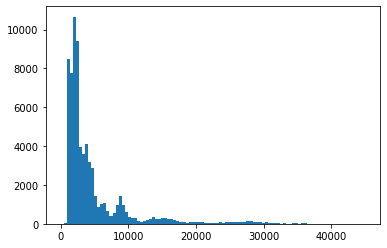

In [7]:
plt.hist('Average_Medicare_Allowed_Amount', bins = 100, data = hospital_cbsa_full_join);

In [8]:
hospital_cbsa_full_join['Average_Medicare_Allowed_Amount'].sort_values(ascending=False)

7643     45030.81
6504     44333.50
7440     43504.21
5626     43179.54
7653     43179.32
           ...   
2664        88.37
3978        51.54
20024       39.72
18578       27.65
69382        2.20
Name: Average_Medicare_Allowed_Amount, Length: 70775, dtype: float64

In [9]:
hospital_cbsa_full_join.corr()

,Provider_ID,Provider_Zip_Code,APC,Beneficiaries,CAPC_Services,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount,CBSA,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
Provider_ID,1.000000,-0.126351,0.000787,-0.006715,-0.005417,-0.030167,-0.028723,-0.008805,0.006651,0.021560,-0.126351,0.029978,0.026402,0.021918,0.029127
Provider_Zip_Code,-0.126351,1.000000,0.007778,-0.034661,-0.030960,0.029825,0.028285,0.032646,0.057129,0.031206,1.000000,0.082253,0.065645,0.060916,0.080644
APC,0.000787,0.007778,1.000000,0.485076,0.431275,-0.104920,-0.098609,0.152186,0.112252,0.049076,0.007778,0.008800,0.006334,0.002684,0.008249
Beneficiaries,-0.006715,-0.034661,0.485076,1.000000,0.933864,-0.112327,-0.108967,0.463503,0.294750,-0.025810,-0.034661,-0.034393,-0.029981,-0.027090,-0.033830
CAPC_Services,-0.005417,-0.030960,0.431275,0.933864,1.000000,-0.108576,-0.104678,0.427632,0.257573,-0.021514,-0.030960,-0.027967,-0.024019,-0.021330,-0.027468
Average_Medicare_Allowed_Amount,-0.030167,0.029825,-0.104920,-0.112327,-0.108576,1.000000,0.998707,-0.019348,0.014311,-0.045557,0.029825,-0.058127,-0.058090,-0.050783,-0.057820
Average_Medicare_Payment_Amount,-0.028723,0.028285,-0.098609,-0.108967,-0.104678,0.998707,1.000000,-0.023221,0.007554,-0.043679,0.028285,-0.056479,-0.056475,-0.049345,-0.056189
Outlier_Services,-0.008805,0.032646,0.152186,0.463503,0.427632,-0.019348,-0.023221,1.000000,0.456020,-0.023513,0.032646,-0.034201,-0.033421,-0.030755,-0.033931
Average_Medicare_Outlier_Amount,0.006651,0.057129,0.112252,0.294750,0.257573,0.014311,0.007554,0.456020,1.000000,-0.034778,0.057129,-0.041938,-0.039973,-0.035874,-0.041308
CBSA,0.021560,0.031206,0.049076,-0.025810,-0.021514,-0.045557,-0.043679,-0.023513,-0.034778,1.000000,0.031206,-0.119152,-0.118775,-0.124721,-0.119907


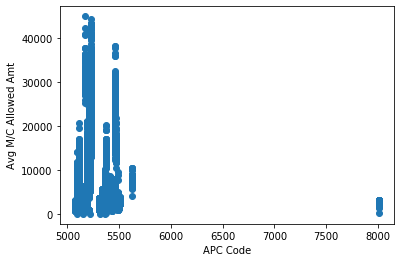

In [10]:
plt.scatter('APC', 'Average_Medicare_Allowed_Amount', data = hospital_cbsa_full_join)
plt.xlabel('APC Code')
plt.ylabel('Avg M/C Allowed Amt');

## READ IN SURGERY CENTER FILE
- sliced to HCPCS 43249
- deleted unnecessary columns
- merged with CBSA file

In [11]:
ascs_cbsa = pd.read_csv('../data/ascs_cbsa.csv')
print(ascs_cbsa.shape)
ascs_cbsa.head()

(682, 32)


,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",NaN,NaN,NaN,NaN,O,1006 NUT TREE ROAD,NaN,VACAVILLE,...,814.53450,2408.4,596.400500,447.812500,46700,95687,0.138815,0.073312,0.091418,0.132562
1,1003079187,WASC LLC,NaN,NaN,NaN,NaN,O,3373 COMMERCE PARKWAY,SUITE 1,WOOSTER,...,555.31000,1850.0,433.162941,474.892941,11740,44691,0.000591,0.000000,0.000000,0.000541
2,1003079187,WASC LLC,NaN,NaN,NaN,NaN,O,3373 COMMERCE PARKWAY,SUITE 1,WOOSTER,...,555.31000,1850.0,433.162941,474.892941,49300,44691,0.423806,0.623565,0.705019,0.443312
3,1003220187,"CENTRAL OHIO ENDOSCOPY CENTER, LLC",NaN,NaN,NaN,NaN,O,3400 OLENTANGY RIVER RD,NaN,COLUMBUS,...,596.51000,750.5,463.132234,478.148830,18140,43202,0.011751,0.007771,0.031900,0.012138
4,1003815242,"DOTHAN SURGERY CENTER, LLC",NaN,NaN,NaN,NaN,O,1450 ROSS CLARK CIR,SUITE 4,DOTHAN,...,509.85778,1300.0,391.675538,477.716614,20020,36301,0.235425,0.254917,0.332344,0.239748


In [12]:
ascs_cbsa = ascs_cbsa.drop(columns = ['First Name of the Provider',
                                      'Middle Initial of the Provider', 
                                      'Credentials of the Provider',
                                      'Gender of the Provider',
                                      'Street Address 2 of the Provider',
                                      'Medicare Participation Indicator',
                                      'ZIP',])
print(ascs_cbsa.shape)
ascs_cbsa.head()

(682, 25)


,National Provider Identifier,Last Name/Organization Name of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,...,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,1006 NUT TREE ROAD,VACAVILLE,95687,CA,US,Ambulatory Surgical Center,F,...,20,814.53450,2408.4,596.400500,447.812500,46700,0.138815,0.073312,0.091418,0.132562
1,1003079187,WASC LLC,O,3373 COMMERCE PARKWAY,WOOSTER,44691,OH,US,Ambulatory Surgical Center,F,...,17,555.31000,1850.0,433.162941,474.892941,11740,0.000591,0.000000,0.000000,0.000541
2,1003079187,WASC LLC,O,3373 COMMERCE PARKWAY,WOOSTER,44691,OH,US,Ambulatory Surgical Center,F,...,17,555.31000,1850.0,433.162941,474.892941,49300,0.423806,0.623565,0.705019,0.443312
3,1003220187,"CENTRAL OHIO ENDOSCOPY CENTER, LLC",O,3400 OLENTANGY RIVER RD,COLUMBUS,43202,OH,US,Ambulatory Surgical Center,F,...,94,596.51000,750.5,463.132234,478.148830,18140,0.011751,0.007771,0.031900,0.012138
4,1003815242,"DOTHAN SURGERY CENTER, LLC",O,1450 ROSS CLARK CIR,DOTHAN,36301,AL,US,Ambulatory Surgical Center,F,...,446,509.85778,1300.0,391.675538,477.716614,20020,0.235425,0.254917,0.332344,0.239748


In [13]:
ascs_cbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 25 columns):
National Provider Identifier                                682 non-null int64
Last Name/Organization Name of the Provider                 682 non-null object
Entity Type of the Provider                                 682 non-null object
Street Address 1 of the Provider                            682 non-null object
City of the Provider                                        682 non-null object
Zip Code of the Provider                                    682 non-null int64
State Code of the Provider                                  682 non-null object
Country Code of the Provider                                682 non-null object
Provider Type                                               682 non-null object
Place of Service                                            682 non-null object
HCPCS Code                                                  682 non-null int64
HCPCS Description 

In [29]:
ascs_cbsa['Average Medicare Allowed Amount'].describe()

count    682.000000
mean     597.786592
std       63.575740
min      132.208596
25%      564.012500
50%      584.610000
75%      613.318250
max      849.930000
Name: Average Medicare Allowed Amount, dtype: float64

In [32]:
ascs_cbsa[ascs_cbsa['Average Medicare Allowed Amount'] == 132.20859649]
# ascs_cbsa[ascs_cbsa['Average Medicare Allowed Amount'] == 132.20859649]

,National Provider Identifier,Last Name/Organization Name of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,...,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO


In [16]:
ascs_cbsa['CBSA'].value_counts()

19100    26
35620    18
99999    18
31080    16
45300    15
         ..
49700     1
10420     1
32540     1
31260     1
31540     1
Name: CBSA, Length: 273, dtype: int64

In [17]:
ascs_cbsa_19100 = ascs_cbsa[ascs_cbsa['CBSA'] == 19100]
ascs_cbsa_19100.head(10)

,National Provider Identifier,Last Name/Organization Name of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,...,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
12,1013227248,"TUSCAN SURGERY CENTER AT LAS COLINAS, LLC",O,701 TUSCAN DR,IRVING,75039,TX,US,Ambulatory Surgical Center,F,...,13,605.340000,2663.000000,438.073846,486.255385,19100,0.004508,0.003973,0.006464,0.004541
20,1023071560,MEDICAL PLAZA AMBULATORY SURGERY CENTER ASSOCI...,O,909 9TH AVE,FORT WORTH,76104,TX,US,Ambulatory Surgical Center,F,...,20,578.038500,7609.250000,425.929500,454.036500,19100,0.003084,0.006746,0.006808,0.003548
21,1578530226,PHYSICIANS SURGICAL CENTER OF FT. WORTH LLP,O,750 12TH AVE,FORT WORTH,76104,TX,US,Ambulatory Surgical Center,F,...,13,592.860000,2719.000000,464.800000,477.090000,19100,0.003084,0.006746,0.006808,0.003548
85,1104947357,TARRANT COUNTY SURGERY CENTER LP,O,3501 MATLOCK ROAD,ARLINGTON,76015,TX,US,Ambulatory Surgical Center,F,...,33,574.894546,8035.696970,450.715151,462.632424,19100,0.002630,0.006309,0.005289,0.003053
91,1114952686,NORTH RICHLAND HILLS ENDOSCOPY CENTER LLC,O,7640 NE LOOP 820,NORTH RICHLAND HILLS,76180,TX,US,Ambulatory Surgical Center,F,...,15,592.860000,2000.000000,464.800000,477.090000,19100,0.005135,0.004889,0.013820,0.005463
95,1114996774,REDBIRD SQUARE ENDOSCOPY CENTER LLC,O,3107 W CAMP WISDOM RD,DALLAS,75237,TX,US,Ambulatory Surgical Center,F,...,14,605.340000,2000.000000,457.662143,459.983571,19100,0.002754,0.003246,0.004305,0.002858
98,1124083076,NORTH GARLAND SURGERY CENTER LLP,O,7150 N GEORGE BUSH HWY,GARLAND,75044,TX,US,Ambulatory Surgical Center,F,...,34,605.340000,5135.000000,463.475588,465.975588,19100,0.005460,0.001556,0.007072,0.005190
196,1295702942,GRAPEVINE SURGICARE PARTNERS LTD,O,2040 W STATE HIGHWAY 114,GRAPEVINE,76051,TX,US,Ambulatory Surgical Center,F,...,46,592.860000,2366.000000,458.156739,470.446739,19100,0.007074,0.009045,0.007574,0.007263
202,1295790327,"ENDOSCOPY OF PLANO, LP",O,1600 COIT RD,PLANO,75075,TX,US,Ambulatory Surgical Center,F,...,36,605.340000,4055.333333,472.622778,475.122778,19100,0.004852,0.006603,0.004629,0.004993
220,1316359532,"LONE STAR ENDOSCOPY CENTER, LLC",O,1001 SURREY LN,FLOWER MOUND,75022,TX,US,Ambulatory Surgical Center,F,...,104,605.340000,2069.000000,458.527981,465.599135,19100,0.002856,0.001461,0.001499,0.002682


In [18]:
ascs_cbsa_19100['Average Medicare Allowed Amount'].sort_values()

85     574.894546
20     578.038500
459    580.117500
583    581.458846
500    588.525000
238    588.933775
21     592.860000
91     592.860000
196    592.860000
624    592.860000
558    593.846203
243    599.163061
365    603.676978
12     605.340000
623    605.340000
621    605.340000
240    605.340000
374    605.340000
239    605.340000
220    605.340000
202    605.340000
98     605.340000
95     605.340000
438    605.340000
644    605.340000
519    809.380000
Name: Average Medicare Allowed Amount, dtype: float64

In [19]:
ascs_cbsa_19100['Average Medicare Allowed Amount'].describe()

count     26.000000
mean     605.136708
std       42.828946
min      574.894546
25%      592.860000
50%      604.508489
75%      605.340000
max      809.380000
Name: Average Medicare Allowed Amount, dtype: float64

In [20]:
ascs_cbsa_34980 = ascs_cbsa[ascs_cbsa['CBSA'] == 34980]
ascs_cbsa_34980.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,...,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
104,1124498357,ENDOSCOPY CENTER OF INLAND EMPIRE LLC,O,401 COMMERCE ST,NASHVILLE,37219,TN,US,Ambulatory Surgical Center,F,...,16,660.990000,2200.00000,512.294375,484.535000,34980,0.003212,0.014801,0.005930,0.004212
155,1225039761,ENDOSCOPY CENTER OF ST THOMAS LP,O,4230 HARDING RD,NASHVILLE,37205,TN,US,Ambulatory Surgical Center,F,...,17,565.636471,1500.00000,435.024706,468.650588,34980,0.014600,0.014513,0.017339,0.014633
198,1295708964,COLUMBIA TN ENDOSCOPY ASC LLC,O,1510 1/2 HATCHER LN,COLUMBIA,38401,TN,US,Ambulatory Surgical Center,F,...,34,587.110000,2427.00000,454.431471,471.222941,34980,0.030371,0.029648,0.033196,0.030353
295,1427152073,PATIENT PARTNERS LLC,O,890 N BLUEJAY WAY,GALLATIN,37066,TN,US,Ambulatory Surgical Center,F,...,23,587.110000,2800.00000,456.564783,473.356087,34980,0.028825,0.025971,0.027137,0.028564
453,1639299803,MURFREESBORO MEDICAL CLINIC P A,O,1272 GARRISON DR,MURFREESBORO,37129,TN,US,Ambulatory Surgical Center,F,...,33,587.110000,739.69697,433.111515,465.513939,34980,0.028104,0.041982,0.040802,0.029441


In [21]:
ascs_cbsa_34980['Average Medicare Allowed Amount'].sort_values()

155    565.636471
198    587.110000
295    587.110000
453    587.110000
104    660.990000
Name: Average Medicare Allowed Amount, dtype: float64

In [22]:
# ascs_cbsa['CBSA == 34980'].value_counts().head(10)


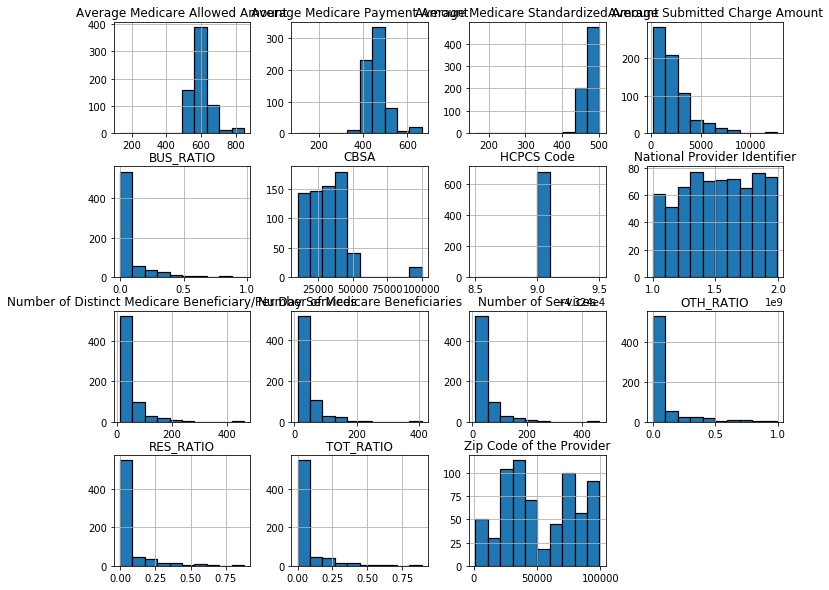

In [23]:
ascs_cbsa.hist(edgecolor="black", linewidth=1.2, figsize=(12, 10));

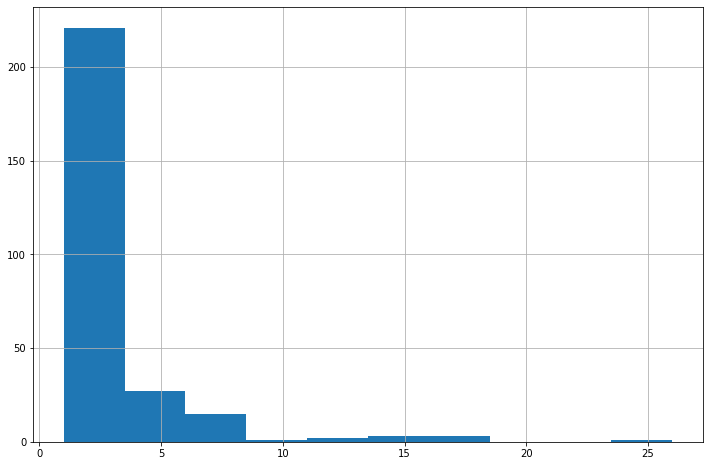

In [24]:
plt.figure(figsize=(12, 8))
ascs_cbsa['CBSA'].value_counts().hist(bins=10)

In [25]:
ascs_cbsa.sort_values('Average Medicare Allowed Amount').tail()

,National Provider Identifier,Last Name/Organization Name of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,...,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
494,1710177795,"ASPEN SURGERY CENTER, LLC",O,133 LA CASA VIA,WALNUT CREEK,94598,CA,US,Ambulatory Surgical Center,F,...,32,848.72,3226.000000,665.400,477.090000,41860,0.006302,0.005988,0.004112,0.006136
44,1033448782,ENDOSCOPY SURGERY CENTER OF SILICON VALLEY LLC,O,2410 SAMARITAN DR,SAN JOSE,95124,CA,US,Ambulatory Surgical Center,F,...,12,849.93,2760.000000,621.660,468.875833,41940,0.022749,0.012768,0.015858,0.021491
547,1801859970,"LOS GATOS SURGICAL CENTER, A CALIFORNIA LIMITE...",O,15195 NATIONAL AVE STE 100,LOS GATOS,95032,CA,US,Ambulatory Surgical Center,F,...,13,849.93,11580.846150,666.340,477.080000,41940,0.016802,0.017351,0.011805,0.016599
673,1982845186,SUTTER BAY MEDICAL FOUNDATION,O,701 E EL CAMINO REAL,MOUNTAIN VIEW,94040,CA,US,Ambulatory Surgical Center,F,...,12,849.93,2980.083333,666.340,477.080000,41940,0.024495,0.017204,0.039401,0.024584
83,1104067115,SUTTER BAY MEDICAL FOUNDATION,O,795 EL CAMINO REAL,PALO ALTO,94301,CA,US,Ambulatory Surgical Center,F,...,48,849.93,2946.218750,664.365,479.565000,41940,0.010830,0.019649,0.016589,0.011924


In [26]:
ascs_cbsa.groupby('CBSA')["Average Medicare Allowed Amount"].mean().head()

CBSA
10100    380.00000
10180    554.04000
10420    557.93000
10580    554.28000
10740    483.91875
Name: Average Medicare Allowed Amount, dtype: float64

In [27]:
ascs_cbsa.groupby('CBSA')["Average Medicare Allowed Amount"].mean().sort_values()

CBSA
10100    380.000000
17820    406.906667
30780    465.153282
10740    483.918750
19460    493.012414
            ...    
46700    824.977250
41500    828.360000
34900    835.420000
41860    844.736000
41940    846.894571
Name: Average Medicare Allowed Amount, Length: 273, dtype: float64

In [28]:
hospital_cbsa_full_join

,Provider_ID,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Provider_HRR,APC,APC_Desc,Beneficiaries,...,Average_Medicare_Allowed_Amount,Average_Medicare_Payment_Amount,Outlier_Services,Average_Medicare_Outlier_Amount,CBSA,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,...,1038.45,826.28,NaN,NaN,20020,36301,0.235425,0.254917,0.332344,0.239748
1,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,...,1792.60,1423.25,NaN,NaN,20020,36301,0.235425,0.254917,0.332344,0.239748
2,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,...,2113.58,1683.99,0.0,0.00,20020,36301,0.235425,0.254917,0.332344,0.239748
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,...,3737.14,2977.55,0.0,0.00,20020,36301,0.235425,0.254917,0.332344,0.239748
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,AL - Dothan,5112,Level 2 Musculoskeletal Procedures,17.0,...,1029.46,820.21,0.0,0.00,20020,36301,0.235425,0.254917,0.332344,0.239748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70770,670122,Houston Methodist The Woodlands Hospital,17201 Interstate 45 South,The Woodlands,TX,77385,TX - Houston,5361,Level 1 Laparoscopy and Related Services,18.0,...,3866.82,3044.48,13.0,1623.73,26420,77385,0.003605,0.003398,0.001517,0.003547
70771,670122,Houston Methodist The Woodlands Hospital,17201 Interstate 45 South,The Woodlands,TX,77385,TX - Houston,5373,Level 3 Urology and Related Services,11.0,...,1469.87,1147.78,NaN,NaN,26420,77385,0.003605,0.003398,0.001517,0.003547
70772,670122,Houston Methodist The Woodlands Hospital,17201 Interstate 45 South,The Woodlands,TX,77385,TX - Houston,5375,Level 5 Urology and Related Services,20.0,...,3356.89,2674.59,NaN,NaN,26420,77385,0.003605,0.003398,0.001517,0.003547
70773,670122,Houston Methodist The Woodlands Hospital,17201 Interstate 45 South,The Woodlands,TX,77385,TX - Houston,5431,Level 1 Nerve Procedures,NaN,...,1506.38,1200.20,NaN,NaN,26420,77385,0.003605,0.003398,0.001517,0.003547
